# Trabajo Practico N° 1
**Autor/a:** Claudia González

**Objetivo general**
Explorar cómo se relaciona la edad materna con el intervalo de gestación y el peso al nacer en Argentina, comparando 2021, 2022 y 2023.

Preguntas guía (operativas)

1- ¿Varía la proporción de bajo peso al nacer según grupos de edad materna?

2- ¿Cómo cambia la gestación corta (<37 semanas) según edad materna?

3- ¿Cambió algo de 2022 a 2023 en esas relaciones?

4- Hipótesis simples (para contrastar con los gráficos):

- Las madres <20 años presentan mayor % de bajo peso y gestación corta.

- Las madres ≥35 años podrían mostrar un leve aumento de cesáreas y cambios en gestación/peso.




In [ ]:
# Librerías utilizadas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Opciones de display para ver mejor las tablas
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 120)


# Estilo general de gráficos (sin forzar colores específicos)
sns.set(context="notebook", style="whitegrid")

print("Entorno listo ✅")



Entorno listo ✅


 Cargo los 3 archivos (2021, 2022, 2023) desde mi repositorio de GitHub.
Leo siempre como texto al principio (para no romper categorías), y luego homogeneizar.

Antes (qué y por qué):
- Voy a leer los CSV desde GitHub asegurando:
  - Separador **;** (como viene del DEIS).
  - **dtype=str** para preservar etiquetas/categorías sin convertir de forma automática.
  - **na_values** para capturar “vacíos” comunes.

# Nueva sección

In [ ]:
# Ver columnas completas al inspeccionar

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Base RAW de tu repo GitHub
base = "https://raw.githubusercontent.com/cgonzalez022407-art/nacidos-vivos-eda/main/data/"

#Función de lectura robusta (intenta ; y, si fallara, prueba ,)
def read_deis_csv_from_github(filename):
    url = base + filename
    try:
        df = pd.read_csv(
            url,
            sep=';',
            dtype=str, # para preservar etiquetas/categorías sin convertir de forma automática.
            na_values=['', ' ', 'NA', 'NaN', 'nan', 'None', '-', 'N/A'], # para capturar “vacíos” comunes.
            low_memory=False,
            encoding='utf-8'
        )
    except Exception:
        df = pd.read_csv(
            url,
            sep=',',
            dtype=str,
            na_values=['', ' ', 'NA', 'NaN', 'nan', 'None', '-', 'N/A'],
            low_memory=False,
            encoding='utf-8'
        )
    return df

df21_raw = read_deis_csv_from_github("nacweb21_0.csv")
df22_raw = read_deis_csv_from_github("nacweb22_0.csv")
df23_raw = read_deis_csv_from_github("nacweb23.csv")

# Añadimos la columna ANIO explícita (útil más adelante)
df21_raw['ANIO'] = '2021'
df22_raw['ANIO'] = '2022'
df23_raw['ANIO'] = '2023'

print("2021:", df21_raw.shape, " | 2022:", df22_raw.shape, " | 2023:", df23_raw.shape)
print("Columnas ejemplo 2021:", list(df21_raw.columns)[:12])


2021: (10072, 9)  | 2022: (9693, 9)  | 2023: (9354, 9)
Columnas ejemplo 2021: ['PROVRES', 'TIPPARTO', 'SEXO', 'IMEDAD', 'ITIEMGEST', 'IMINSTRUC', 'IPESONAC', 'CUENTA', 'ANIO']


In [ ]:
# Verificar las primeras filas del dataset
df21_raw.head()
# Mostrar los nombres de las columnas
print(f"Nombres de las columnas: {df21_raw.columns}")
# Mostrar los nombres de las columnas
print(f"Nombres de las columnas: {df22_raw.columns}")
# Mostrar los nombres de las columnas
print(f"Nombres de las columnas: {df23_raw.columns}")


Nombres de las columnas: Index(['PROVRES', 'TIPPARTO', 'SEXO', 'IMEDAD', 'ITIEMGEST', 'IMINSTRUC', 'IPESONAC', 'CUENTA', 'ANIO'], dtype='object')
Nombres de las columnas: Index(['PROVRES', 'TIPPARTO', 'SEXO', 'IMEDAD', 'ITIEMGEST', 'IMINSTRUC', 'IPESONAC', 'CUENTA', 'ANIO'], dtype='object')
Nombres de las columnas: Index(['PROVRES', 'TIPPARTO', 'SEXO', 'IMEDAD', 'ITIEMGEST', 'IMINSTRUC', 'IPESONAC', 'CUENTA', 'ANIO'], dtype='object')


observo que mis columnas tiene el mismo nombre, no necesito normalizar nombre de columnas

In [ ]:
df22_raw.head()


,PROVRES,TIPPARTO,SEXO,IMEDAD,ITIEMGEST,IMINSTRUC,IPESONAC,CUENTA,ANIO
0,90,1,1,4.25 a 29,3.24 a 27,3.Secundario/Polimodal Completa y más,3.Sin especificar,1,2022
1,66,1,2,6.35 a 39,7.42 y más,1.Hasta Primaria/C.EGB Completa,2.2500 gramos y más,1,2022
2,50,1,1,4.25 a 29,3.24 a 27,1.Hasta Primaria/C.EGB Completa,1.Menos de 2500 gramos,1,2022
3,06,1,2,9.Sin especificar,4.28 a 31,2.Secundaria/Polimodal Incompleta,1.Menos de 2500 gramos,1,2022
4,86,1,2,8.De 45 y más,6.37 a 41,3.Secundario/Polimodal Completa y más,2.2500 gramos y más,1,2022


In [ ]:
df23_raw.head()

,PROVRES,TIPPARTO,SEXO,IMEDAD,ITIEMGEST,IMINSTRUC,IPESONAC,CUENTA,ANIO
0,66,1,2,6.35 a 39,7.42 y más,1.Hasta Primaria/C.EGB Completa,2.2500 gramos y más,2,2023
1,06,2,2,3.20 a 24,3.24 a 27,1.Hasta Primaria/C.EGB Completa,1.Menos de 2500 gramos,3,2023
2,30,2,2,4.25 a 29,5.32 a 36,4.Sin especificar,1.Menos de 2500 gramos,1,2023
3,50,1,1,4.25 a 29,3.24 a 27,1.Hasta Primaria/C.EGB Completa,1.Menos de 2500 gramos,1,2023
4,06,1,2,9.Sin especificar,4.28 a 31,2.Secundaria/Polimodal Incompleta,1.Menos de 2500 gramos,2,2023


In [ ]:

# 1) Renombrar a nombres claros (solo legibilidad)
colmap = {
    'PROVRES'  : 'provincia_residencia',# Provincia de residencia de la madre
    'TIPPARTO' : 'tipo_parto',# Tipo de parto (p.ej. Vaginal/Cesárea)
    'SEXO'     : 'sexo_rn',# Sexo del recién nacido
    'IMEDAD'   : 'grupo_edad_madre',# Intervalo de edad de la madre (categoría)
    'ITIEMGEST': 'intervalo_gestacion',# Intervalo de tiempo de gestación (semanas, por rangos)
    'IMINSTRUC': 'instruccion_materna',# Máximo nivel de instrucción alcanzado por la madre
    'IPESONAC' : 'intervalo_peso_nacer',# Intervalo de peso al nacer (por rangos en gramos)
    'CUENTA'   : 'nacidos',# Conteo de nacidos vivos para esa combinación
    'ANIO'     : 'anio' # Año de referencia (2021/2022/2023)
}


def tidy(df):
    df = df.rename(columns=colmap).copy()

# strings prolijos
    for c in ['provincia_residencia','tipo_parto','sexo_rn',
              'grupo_edad_madre','intervalo_gestacion','instruccion_materna',
              'intervalo_peso_nacer','anio']:
        df[c] = df[c].astype(str).str.strip()

    # cuenta a numérico
    df['nacidos'] = pd.to_numeric(df['nacidos'], errors='coerce')
    return df

df21_std = tidy(df21_raw)
df22_std = tidy(df22_raw)
df23_std = tidy(df23_raw)

# 2) Unimos
df = pd.concat([df21_std, df22_std, df23_std], ignore_index=True)

# 3) Chequeos rápidos
print(df.shape)
print(df[['anio','nacidos']].groupby('anio').sum())
print("Ejemplo de categorías IMEDAD:", df['grupo_edad_madre'].dropna().unique()[:8])
print("Ejemplo de categorías ITIEMGEST:", df['intervalo_gestacion'].dropna().unique()[:8])
print("Ejemplo de categorías IPESONAC:", df['intervalo_peso_nacer'].dropna().unique()[:8])


(29119, 9)
      nacidos
anio         
2021   529794
2022   495295
2023   460902
Ejemplo de categorías IMEDAD: ['4.25 a 29' '5.30 a 34' '2.15 a 19' '3.20 a 24' '8.De 45 y más'
 '6.35 a 39' '1.Menor de 15' '7.40 a 44']
Ejemplo de categorías ITIEMGEST: ['8.Sin especificar' '4.28 a 31' '3.24 a 27' '6.37 a 41' '5.32 a 36'
 '7.42 y más' '2.22 a 23' '1.Menos de 22']
Ejemplo de categorías IPESONAC: ['2.2500 gramos y más' '1.Menos de 2500 gramos' '3.Sin especificar']


Se puede observar lo siguiente:
- Tenmos 29.119 filas y 9 columnas
- en la tabla nacido vivos totales por año en Argentina se ve una tendencia descendente
- podemos ver ejemplos por categorias:
  - **Grupo edad de madres**
   - Menor de 15
   - 15 a 19 ← (adolescente, junto con “Menor de 15”)
   - 20 a 24
   - 25 a 29
   - 30 a 34
   - 35 a 39
   - 40 a 44
   - De 45 y más
  Para nuestra nueva feature madre_adolescente: tomare “1.Menor de 15” y “2.15 a 19” como 1 (sí), y el resto como 0 (no).
  
ITIEMGEST →hace referencia al intervalo_gestacion Ordenado po semanas:

- Menos de 22

- 22 a 23

- 24 a 27

- 28 a 31

- 32 a 36 ← pre-término (<37 semanas)

- 37 a 41 ← término

- 42 y más ← post-término

- Sin especificar

Para la segunda feature gestacion_corta: 1 si está en 1–5, 0 si está en 6–7, y tratamos 8 (Sin especificar) aparte (no lo marcamos como 1, para no sesgar).

**IPESONAC → intervalo_peso_nacer**
- Bajo peso: “1.Menos de 2500 gramos”.

- “2.2500 gramos y más” agrupa normal y macrosomía (no hay corte ≥4000 en tu versión).

- “3.Sin especificar” lo tratamos como categoría aparte.

Para bajo_peso: 1 si es “1.Menos de 2500…”, 0 en los demás (sin especificar se mantiene como 0 y lo reportamos como categoría faltante/no especificada en tablas).

# Missing values

In [ ]:
cat_cols = ['provincia_residencia','tipo_parto','sexo_rn',
            'grupo_edad_madre','intervalo_gestacion',
            'instruccion_materna','intervalo_peso_nacer']

# ¿Alguna de estas columnas tiene NaN en la fila?
filas_con_nan = df[cat_cols].isna().any(axis=1)

# % ponderado por nacidos
pct_nacidos_con_nan = (df.loc[filas_con_nan, 'nacidos'].sum()) / df['nacidos'].sum()
print(f"% de nacidos en filas con NaN reales: {pct_nacidos_con_nan:.2%}")


% de nacidos en filas con NaN reales: 0.00%


El porcentaje de nacidos en filas con NaN reales es 0.00%. Esto significa que no hay celdas vacías “verdaderas” en las variables categóricas analizadas.
Decisión. No realizamos imputación de NaN. Continuamos tratando “Sin especificar” como categoría explícita.

In [ ]:
# Buscar 'Sin especificar' sin distinguir mayúsculas/minúsculas
def prop_sin_especificar(df, col):
    mask = df[col].str.contains('sin especificar', case=False, na=False)
    return df.loc[mask, 'nacidos'].sum() / df['nacidos'].sum()

for c in ['grupo_edad_madre','intervalo_gestacion','intervalo_peso_nacer',
          'instruccion_materna','sexo_rn','tipo_parto','provincia_residencia']:
    p = prop_sin_especificar(df, c)
    print(f"{c}: % 'Sin especificar' (ponderado) {p:.2%}")


grupo_edad_madre: % 'Sin especificar' (ponderado) 1.31%
intervalo_gestacion: % 'Sin especificar' (ponderado) 1.42%
intervalo_peso_nacer: % 'Sin especificar' (ponderado) 1.41%
instruccion_materna: % 'Sin especificar' (ponderado) 6.82%
sexo_rn: % 'Sin especificar' (ponderado) 0.00%
tipo_parto: % 'Sin especificar' (ponderado) 0.00%
provincia_residencia: % 'Sin especificar' (ponderado) 0.00%


Detectamos “Sin especificar” con estos niveles:
- Edad materna ≈ 1.31%; Gestación ≈ 1.42%; Peso al nacer ≈ 1.41%.
- Instrucción materna alcanza 6.82% (peor completitud).
- Sexo RN, Tipo de parto y Provincia: 0.00%.

Decisión. En análisis descriptivos mantenemos “Sin especificar” como categoría. Para indicadores clínicos (bajo peso, gestación corta) mostraremos también una vista excluyéndolo, y documentaremos la pérdida de cobertura.

In [ ]:
def por_anno_prop_sin(df, col):
    es = df[col].str.contains('sin especificar', case=False, na=False)
    g = df.groupby('anio', as_index=True)
    return ((df.loc[es, :].groupby('anio')['nacidos'].sum()) / (g['nacidos'].sum())).rename(col)

res_anio = pd.concat([
    por_anno_prop_sin(df, 'grupo_edad_madre'),
    por_anno_prop_sin(df, 'intervalo_gestacion'),
    por_anno_prop_sin(df, 'intervalo_peso_nacer')
], axis=1)

print("\n% 'Sin especificar' ponderado por año:")
print(res_anio.applymap(lambda x: f"{x:.2%}"))



% 'Sin especificar' ponderado por año:
     grupo_edad_madre intervalo_gestacion intervalo_peso_nacer
anio                                                          
2021            1.92%               2.31%                2.40%
2022            1.01%               1.08%                0.90%
2023            0.92%               0.77%                0.80%


/tmp/ipython-input-661347233.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(res_anio.applymap(lambda x: f"{x:.2%}"))


Se observa una mejora de calidad de registro:
- Edad materna baja de 1.92% → 0.92%.
- Gestación baja de 2.31% → 0.77%.
- Peso al nacer baja de 2.40% → 0.80%.

Conclusión. Entre 2021 y 2023 disminuyen los “Sin especificar”, por lo que los análisis de 2022–2023 serán ligeramente más confiables que 2021 en estas dimensiones.

In [ ]:
for col in ['grupo_edad_madre','intervalo_gestacion','intervalo_peso_nacer']:
    filas = df[col].str.contains('sin especificar', case=False, na=False).sum()
    nac = df.loc[df[col].str.contains('sin especificar', case=False, na=False), 'nacidos'].sum()
    print(f"{col}: filas con 'Sin especificar' = {filas}, nacidos ponderados = {nac:,}")


grupo_edad_madre: filas con 'Sin especificar' = 647, nacidos ponderados = 19,424
intervalo_gestacion: filas con 'Sin especificar' = 1874, nacidos ponderados = 21,140
intervalo_peso_nacer: filas con 'Sin especificar' = 1556, nacidos ponderados = 20,879


**Interpretación**
- Edad materna: 647 combinaciones con “Sin especificar”, que representan 19.424 nacidos.
- Gestación: 1.874 combinaciones, 21.140 nacidos.
- Peso al nacer: 1.556 combinaciones, 20.879 nacidos.

Por qué importa. En tablas agregadas, lo relevante no es cuántas filas hay con “Sin especificar”, sino cuántos nacidos abarcan. Por eso ponderamos por nacidos en todos los porcentajes.



***hago un grafico de barra para visualizo el % de “Sin especificar” por año en Edad materna, Gestación, Peso al nacer, para evidenciar la mejora de calidad entre 2021–2023.***

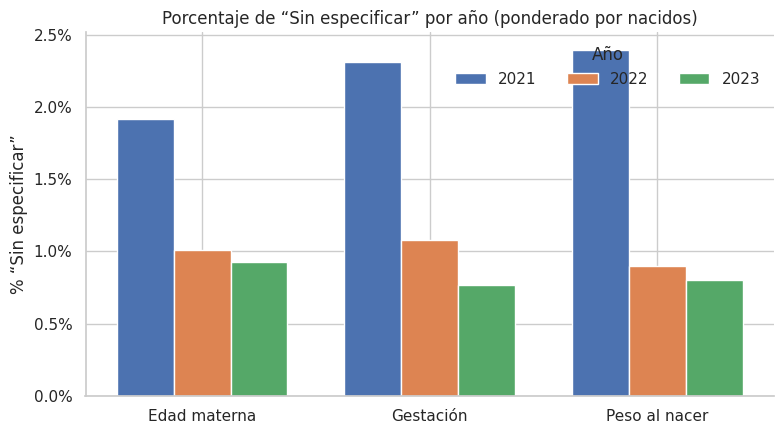

In [ ]:
# --- Cálculo (por si no quedó en memoria) ---
def por_anno_prop_sin(df, col):
    es = df[col].str.contains('sin especificar', case=False, na=False)
    g = df.groupby('anio', as_index=True)
    return ((df.loc[es, :].groupby('anio')['nacidos'].sum()) / (g['nacidos'].sum())).rename(col)

res_anio = pd.concat([
    por_anno_prop_sin(df, 'grupo_edad_madre'),
    por_anno_prop_sin(df, 'intervalo_gestacion'),
    por_anno_prop_sin(df, 'intervalo_peso_nacer')
], axis=1).reset_index()

# Pasamos a formato largo para graficar fácilmente con Matplotlib
res_long = (res_anio
            .melt(id_vars='anio', var_name='variable', value_name='prop_sin')
            .sort_values(['variable','anio']))

# --- Gráfico Matplotlib: barras agrupadas ---
import matplotlib.pyplot as plt
import numpy as np

vars_ord = ['grupo_edad_madre','intervalo_gestacion','intervalo_peso_nacer']
res_long['variable'] = pd.Categorical(res_long['variable'], vars_ord, ordered=True)
res_plot = res_long.sort_values(['variable','anio'])

anios = ['2021','2022','2023']
x = np.arange(len(vars_ord))
width = 0.25

fig, ax = plt.subplots(figsize=(8,4.5))

for i, y in enumerate(anios):
    vals = [res_plot[(res_plot['variable']==v) & (res_plot['anio']==y)]['prop_sin'].values[0] for v in vars_ord]
    ax.bar(x + (i-1)*width, vals, width, label=y)

ax.set_xticks(x)
ax.set_xticklabels(['Edad materna','Gestación','Peso al nacer'])
ax.set_ylabel('% “Sin especificar”')
ax.set_title('Porcentaje de “Sin especificar” por año (ponderado por nacidos)')

# Formato en porcentaje en el eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v*100:.1f}%'))

ax.legend(title='Año', ncol=3, frameon=False)
ax.spines[['top','right']].set_visible(False)
plt.tight_layout()
plt.show()


En las tres variables, el % de “Sin especificar” desciende de 2021 a 2023. La caída es más marcada en Gestación y Peso, lo que respalda trabajar con ambos años finales para comparaciones más confiables.

# Outliers

voy analizar por provincia y año

Calculo loss nacidos por provincia × año y graficamos un boxplot por año con puntos (cada provincia). Así se ven “colas” y posibles outliers.

In [ ]:
# Nacidos por provincia y año
prov_year = (df.groupby(['anio','provincia_residencia'], as_index=False)['nacidos']
               .sum()
               .sort_values(['anio','nacidos'], ascending=[True, False]))

# Umbrales IQR por año para diagnosticar
def iqr_bounds(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

bounds = (prov_year.groupby('anio')['nacidos']
                  .apply(lambda s: pd.Series(iqr_bounds(s), index=['low','high']))
                  .reset_index())

bounds


,anio,level_1,nacidos
0,2021,low,-18107.375
1,2021,high,43711.625
2,2022,low,-16595.875
3,2022,high,40935.125
4,2023,low,-16152.500
5,2023,high,38725.500


**low negativo:** es normal en el IQR; indica que no hay outliers por abajo (porque los conteos no pueden ser negativos).

**high ~ 38–44 mil:** todo lo que quede por arriba de ese umbral es “atípico alto” por IQR, pero no es error, refleja provincias grandes.

Esto justifica que no eliminemos nada y que compararemos en proporciones, no en crudos.

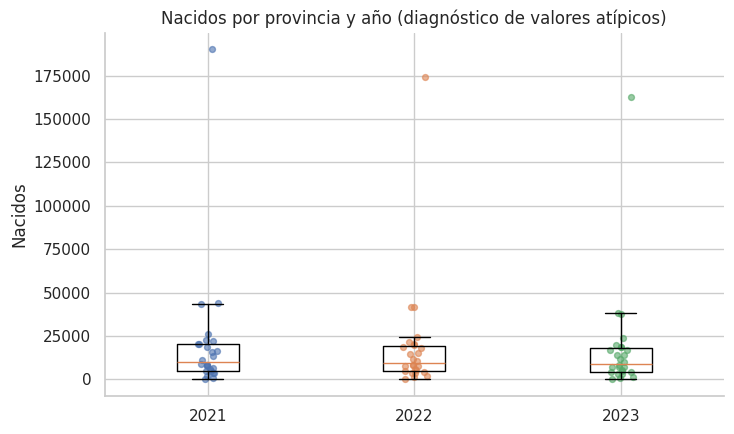

In [ ]:
# --- Gráfico Matplotlib: boxplot por año + puntos de provincias ---

fig, ax = plt.subplots(figsize=(7.5,4.5))

# Boxplot
data_for_plot = [prov_year.loc[prov_year['anio']==y, 'nacidos'] for y in ['2021','2022','2023']]
ax.boxplot(data_for_plot, tick_labels=['2021','2022','2023'], showfliers=False)

# Scatter de provincias (ligero jitter en X)
for i, y in enumerate(['2021','2022','2023'], start=1):
    yy = prov_year[prov_year['anio']==y]['nacidos'].values
    xj = np.random.normal(loc=i, scale=0.03, size=len(yy))
    ax.scatter(xj, yy, alpha=0.6, s=18)
    np.random.seed(7)


ax.set_title('Nacidos por provincia y año (diagnóstico de valores atípicos)')
ax.set_ylabel('Nacidos')
ax.spines[['top','right']].set_visible(False)
plt.tight_layout(); plt.show()


Las diferencias entre provincias son esperables por tamaño poblacional. Los umbrales IQR señalan algunos valores altos, pero representan heterogeneidad real, no errores.
**Decisión. **Para comparar categorías (edad, gestación, peso), se trabajará con proporciones ponderadas por nacidos, evitando sesgos por tamaño.

Definimos órdenes lógicos y creamos columnas limpias (*_txt) y ordenadas (*_ord).

# Transformación de variables

- Limpio prefijos como “1.”, “2.” en las categorías (strip_prefix) para quedarme solo con el texto.

- Paso las columnas IMEDAD, ITIEMGEST, IPESONAC a versiones limpias (edad_txt, gesta_txt, peso_txt) y luego a categóricas ordenadas (edad_ord, gesta_ord, peso_ord).

**Defino un orden lógico:**

- Edad: menor de 15 → … → de 45 y más → sin especificar.

- Gestación: menos de 22 → … → 42 y más → sin especificar.

- Peso: menos de 2500 g → 2500 g y más → sin especificar.

Motivo: el orden correcto evita gráficos “desordenados” y permite comparaciones coherentes (por ejemplo, leer edades de menor a mayor o gestación de pre-término a post-término).


In [ ]:
import re

def strip_prefix(x):
    # quita "n." inicial y pasa a minúscula prolija
    x = str(x).strip()
    x = re.sub(r'^\s*\d+\.\s*', '', x)
    return re.sub(r'\s+', ' ', x).lower()

df['edad_txt']  = df['grupo_edad_madre'].map(strip_prefix)
df['gesta_txt'] = df['intervalo_gestacion'].map(strip_prefix)
df['peso_txt']  = df['intervalo_peso_nacer'].map(strip_prefix)

# Órdenes lógicos (ajustados a tus categorías observadas)
edad_order  = ['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más','sin especificar']
gesta_order = ['menos de 22','22 a 23','24 a 27','28 a 31','32 a 36','37 a 41','42 y más','sin especificar']
# En tu set: dos niveles + sin especificar
peso_order  = ['menos de 2500 gramos','2500 gramos y más','sin especificar']

# Convertimos a categóricas ordenadas
df['edad_ord']  = pd.Categorical(df['edad_txt'],  categories=edad_order,  ordered=True)
df['gesta_ord'] = pd.Categorical(df['gesta_txt'], categories=gesta_order, ordered=True)
df['peso_ord']  = pd.Categorical(df['peso_txt'],  categories=peso_order,  ordered=True)

# Chequeo rápido (que no queden NaN por etiquetas desconocidas)
print("Etiquetas edad no mapeadas:", set(df['edad_txt'].unique()) - set(edad_order))
print("Etiquetas gesta no mapeadas:", set(df['gesta_txt'].unique()) - set(gesta_order))
print("Etiquetas peso no mapeadas:",  set(df['peso_txt'].unique())  - set(peso_order))


Etiquetas edad no mapeadas: set()
Etiquetas gesta no mapeadas: set()
Etiquetas peso no mapeadas: set()


Los tres mensajes “Etiquetas … no mapeadas: set()” confirman que no quedaron categorías fuera del orden.
Ya puedo usar edad_ord, gesta_ord, peso_ord en tablas y gráficos con un orden clínicamente interpretable.

Ahora quiero obtener la distribución por grupos de edad materna dentro de cada año (2021–2023).

Lo que voy hacer primero es sumar nacidos por anio × edad_ord. Luego calculo la proporción dentro del año usando groupby('anio').transform(lambda s: s/sum) para que cada fila quede normalizada respecto del total anual.

Asi puedo trabajar con proporciones ponderadas (no con conteos crudos) permite comparar años aun cuando el total de nacidos cambia.

In [ ]:
edad_base = (df.groupby(['anio','edad_ord'], observed=True, as_index=False)['nacidos']
               .sum())
edad_base['prop'] = edad_base.groupby('anio')['nacidos']\
                             .transform(lambda s: (s/s.sum()).round(4))
tmp = edad_base[['anio','edad_ord','prop']].sort_values(['anio','edad_ord'])
tmp.head()


,anio,edad_ord,prop
0,2021,menor de 15,0.0026
1,2021,15 a 19,0.0873
2,2021,20 a 24,0.2162
3,2021,25 a 29,0.2474
4,2021,30 a 34,0.2311


- La tabla tmp presenta, para cada año y grupo de edad, la columna prop = % de nacidos que pertenece a ese grupo dentro del año (suma 1 por año).

- Se observa que los grupos 25–29 y 30–34 concentran la mayor proporción de nacidos; <20 representa una fracción menor.

- Esta “foto de composición” es la base para interpretar, más adelante, diferencias en bajo peso y gestación corta por edad, evitando confundir cambios de estructura etaria con cambios de resultado perinatal.

**Decisión**: seguire usando estas proporciones normalizadas como denominador de referencia en los gráficos y tablas comparativas.

Gráfico Matplotlib: distribución % por grupos de edad dentro de cada año (barras 100%).

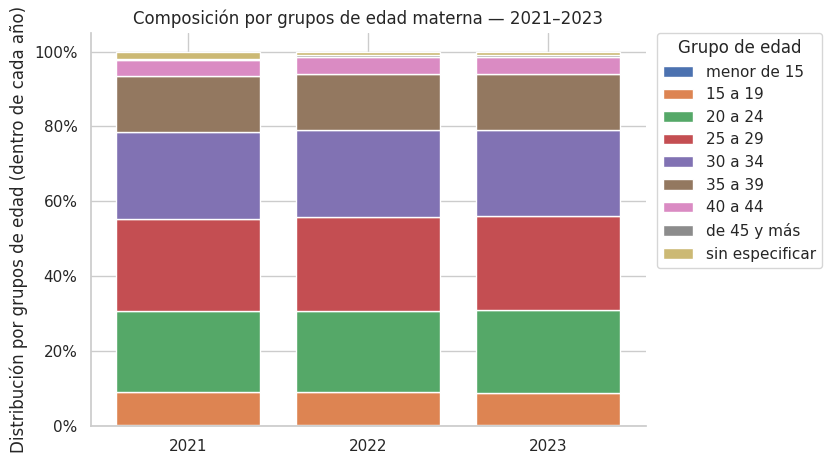

In [ ]:
# Tabla base: nacidos por anio x edad
edad_base = (df.groupby(['anio','edad_ord'], observed=True, as_index=False)['nacidos']
               .sum())

# Proporción dentro de cada año (ponderado)
edad_base['prop'] = edad_base.groupby('anio')['nacidos'].transform(lambda s: s / s.sum())

# Matriz año × edad para apilar
edad_mat = (edad_base.pivot(index='anio', columns='edad_ord', values='prop')
                      .reindex(columns=edad_order))

# --- Gráfico: barras apiladas 100% ---
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.5,4.8))
bottom = np.zeros(len(edad_mat.index))
x = np.arange(len(edad_mat.index))

for col in edad_mat.columns:
    vals = edad_mat[col].fillna(0).values
    ax.bar(x, vals, bottom=bottom, label=col)
    bottom += vals

ax.set_xticks(x)
ax.set_xticklabels(edad_mat.index)
ax.set_ylabel('Distribución por grupos de edad (dentro de cada año)')
ax.set_title('Composición por grupos de edad materna — 2021–2023')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v*100:.0f}%'))
ax.legend(title='Grupo de edad', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
ax.spines[['top','right']].set_visible(False)
plt.tight_layout(); plt.show()


La mayor proporción de nacidos se concentra en 25–29 y 30–34 años. El grupo <20 representa una fracción menor y se mantiene relativamente estable (ver % exactos en la tabla). Esta foto de composición es clave para leer luego los indicadores de bajo peso y gestación corta por edad.

# Features (variables derivadas)

Voy a crear 3 indicadores para relacionar edad materna con resultados perinatales: madre_adolescente (<20), gestacion_corta (<37 semanas) y bajo_peso (<2500 g). Todas las proporciones se calculan ponderadas por nacidos.

Voy a crear 3 indicadores binarios para medir asociación entre edad materna y resultados perinatales (prematuridad y bajo peso). Calcularemos porcentajes ponderados por nacidos para no sesgar por tamaños:
1) `madre_adolescente` = 1 si <20 años; 0 si no.  ( esto me va ayudar a ver grupo históricamente más vulnerable.)
2) `gestacion_corta` = 1 si <37 semanas; 0 si ≥37.  (esto me va ayudar a ver el indicador de prematuridad.)
3) `bajo_peso` = 1 si <2500 g; 0 si ≥2500 g. (esto me va ayudar a ver el resultado neonatal adverso.)




In [ ]:
# 1) madre_adolescente
df['madre_adolescente'] = df['edad_ord'].isin(['menor de 15','15 a 19']).astype(int)

# 2) gestacion_corta (<37 semanas)
df['gestacion_corta'] = df['gesta_ord'].isin(['menos de 22','22 a 23','24 a 27','28 a 31','32 a 36']).astype(int)

# 3) bajo_peso (<2500 g)
df['bajo_peso'] = df['peso_ord'].eq('menos de 2500 gramos').astype(int)

# Chequeo rápido (ponderado por año)
def prop_flag(df, flag):
    return (df.groupby('anio')
              .apply(lambda g: (g[flag]*g['nacidos']).sum()/g['nacidos'].sum())
              .rename(f'prop_{flag}'))

print(prop_flag(df,'madre_adolescente'))
print(prop_flag(df,'gestacion_corta'))
print(prop_flag(df,'bajo_peso'))


anio
2021    0.089903
2022    0.089436
2023    0.088001
Name: prop_madre_adolescente, dtype: float64
anio
2021    0.088166
2022    0.091006
2023    0.093992
Name: prop_gestacion_corta, dtype: float64
anio
2021    0.071903
2022    0.078198
2023    0.077448
Name: prop_bajo_peso, dtype: float64


/tmp/ipython-input-2657599224.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g[flag]*g['nacidos']).sum()/g['nacidos'].sum())
/tmp/ipython-input-2657599224.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g[flag]*g['nacidos']).sum()/g['nacidos'].sum())
/tmp/ipython-input-2657599224.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns

Las 3 variables binarias quedan definidas a partir de las categorías ordenadas. No imputamos; tratamos “Sin especificar” como categoría a excluir en los análisis clínicos.

Ahora visualizo, para cada grupo de edad, cómo se reparte el peso al nacer (proporciones dentro de cada edad). Excluyo “Sin especificar” para una lectura clínica limpia. Comparo 2021–2023.

/tmp/ipython-input-3340700499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())
/tmp/ipython-input-3340700499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())


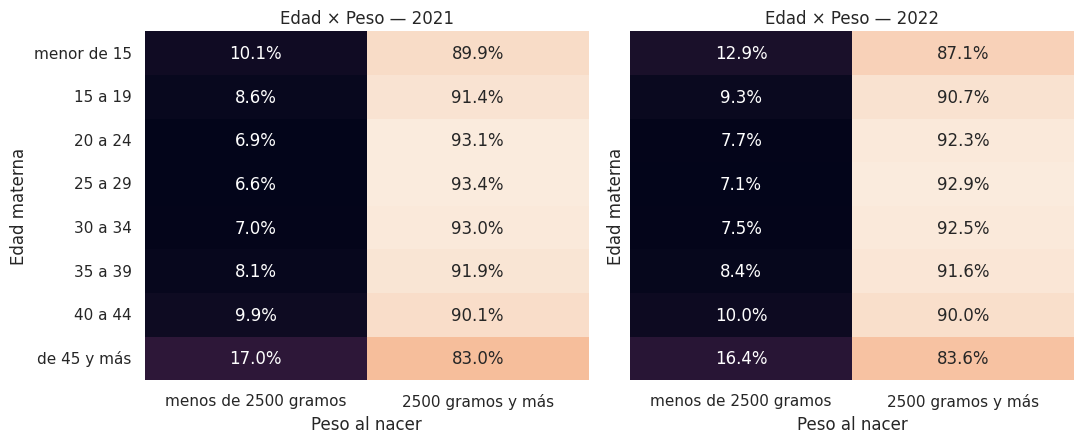

/tmp/ipython-input-3340700499.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())


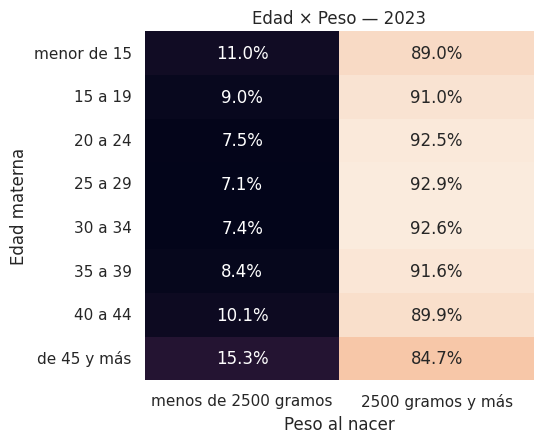

In [ ]:
d_clean = df[(~df['edad_ord'].isin(['sin especificar'])) & (~df['peso_ord'].isin(['sin especificar']))]

def prop_matrix(d, year):
    g = (d[d['anio']==year]
           .groupby(['edad_ord','peso_ord'], observed=True, as_index=False)['nacidos']
           .sum())
    # proporción dentro de cada edad
    g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())
    m = (g.pivot(index='edad_ord', columns='peso_ord', values='prop')
           .reindex(index=['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más'],
                    columns=['menos de 2500 gramos','2500 gramos y más']))
    return m

fig, axes = plt.subplots(1, 2, figsize=(11,4.6), sharey=True)
for ax, y in zip(axes, ['2021','2022']):
    m = prop_matrix(d_clean, y)
    sns.heatmap(m, annot=True, fmt='.1%', cbar=False, ax=ax)
    ax.set_title(f'Edad × Peso — {y}')
    ax.set_xlabel('Peso al nacer'); ax.set_ylabel('Edad materna')

plt.tight_layout(); plt.show()

m23 = prop_matrix(d_clean, '2023')
plt.figure(figsize=(5.6,4.6))
sns.heatmap(m23, annot=True, fmt='.1%', cbar=False)
plt.title('Edad × Peso — 2023'); plt.xlabel('Peso al nacer'); plt.ylabel('Edad materna')
plt.tight_layout(); plt.show()


En los tres años, el % de bajo peso (<2500 g) es más alto en los extremos de edad materna: adolescentes (<20) y ≥45, y más bajo en los grupos 25–29 y 30–34. El patrón es consistente 2021→2023, con variaciones leves.
Esto sugiere una asociación entre edad materna y resultados perinatales: los extremos etarios concentran mayor riesgo de bajo peso al nacer.

Tabla con % exactos — Gestación corta (<37) por edad y año

para cada edad y año, # nacidos con gestación_corta=1 dividido por el total de nacidos en ese grupo. Todo ponderado por nacidos y excluyendo “Sin especificar”.

Esto me va a permitir cuantificar con porcentajes exactos lo que vimos en el gráfico; deja números para citar en la presentación.

In [ ]:
# --- Tabla % gestación <37 por edad (filas) y año (columnas) ---
from IPython.display import display

edad_order  = ['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más']

# 1) Filtrar categorías válidas
d_gc = df[(~df['edad_ord'].isin(['sin especificar'])) & (~df['gesta_ord'].isin(['sin especificar']))]

# 2) Numerador y denominador ponderados
num = (d_gc[d_gc['gestacion_corta']==1]
       .groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())
den = (d_gc.groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())

# 3) Pivot: filas=edad, columnas=año; ordenar filas y columnas
gc_tab_piv = (num/den).unstack('anio')\
                      .reindex(index=edad_order)\
                      .reindex(columns=['2021','2022','2023'])

# 4) Versión porcentual
gc_tab_pct = (gc_tab_piv * 100).round(1)

# 5) Mostrar en pantalla (y estilo %)
display(gc_tab_pct.style.format('{:.1f}%').set_caption('Gestación <37 semanas por edad y año (%)'))

# 6) (Opcional) Exportar a CSV
gc_tab_pct.to_csv('tabla_gestacion_corta_edad_anio.csv', encoding='utf-8-sig')


anio,2021,2022,2023
edad_ord,,,
menor de 15,12.4%,14.1%,13.4%
15 a 19,9.5%,9.8%,9.8%
20 a 24,8.2%,8.5%,8.7%
25 a 29,8.4%,8.6%,8.9%
30 a 34,8.8%,9.1%,9.3%
35 a 39,10.2%,10.1%,10.5%
40 a 44,12.1%,11.6%,12.4%
de 45 y más,18.0%,19.7%,19.3%


los porcentajes más altos de gestación <37 semanas se observan en los extremos etarios:

- Adolescentes (<20): ~12–14%.

- ≥45 años: ~18–19%.
En los grupos de referencia (25–29 y 30–34) los valores son menores, ~8–10%.
Conclusión: hay asociación entre edad materna y prematuridad; los extremos presentan mayor riesgo que los grupos 25–29/30–34. El patrón es consistente 2021→2023 (variaciones leves).

Implicancia para decisiones: foco de vigilancia y prevención en adolescentes y ≥45, manteniendo el monitoreo anual para ver si las brechas se reducen.

Construyo, para cada año, la distribución del peso al nacer dentro de cada grupo de edad. Excluyo “Sin especificar”. Esto complementa el heatmap con una tabla en % que puedo citar en la presentación.

Para cada grupo de edad materna, muestro la distribución del peso al nacer (columnas: <2500 g y ≥2500 g).

In [ ]:
from IPython.display import display

edad_order  = ['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más']
peso_cols   = ['menos de 2500 gramos','2500 gramos y más']

def tabla_peso_por_edad(df, year):
    d = df[(df['anio']==year) &
           (~df['edad_ord'].isin(['sin especificar'])) &
           (~df['peso_ord'].isin(['sin especificar']))]
    g = (d.groupby(['edad_ord','peso_ord'], observed=True, as_index=False)['nacidos'].sum())
    g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())
    m = (g.pivot(index='edad_ord', columns='peso_ord', values='prop')
           .reindex(index=edad_order, columns=peso_cols))
    return (m * 100).round(1)  # % listo

tbl_peso_2021 = tabla_peso_por_edad(df,'2021')
tbl_peso_2022 = tabla_peso_por_edad(df,'2022')
tbl_peso_2023 = tabla_peso_por_edad(df,'2023')

display(tbl_peso_2021.style.format('{:.1f}%').set_caption('Edad × Peso — 2021 (%)'))
display(tbl_peso_2022.style.format('{:.1f}%').set_caption('Edad × Peso — 2022 (%)'))
display(tbl_peso_2023.style.format('{:.1f}%').set_caption('Edad × Peso — 2023 (%)'))

# (Opcional) exportar CSV
tbl_peso_2021.to_csv('tabla_edad_x_peso_2021.csv', encoding='utf-8-sig')
tbl_peso_2022.to_csv('tabla_edad_x_peso_2022.csv', encoding='utf-8-sig')
tbl_peso_2023.to_csv('tabla_edad_x_peso_2023.csv', encoding='utf-8-sig')


/tmp/ipython-input-906512163.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())
/tmp/ipython-input-906512163.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby('edad_ord')['nacidos'].transform(lambda s: s / s.sum())
/tmp/ipython-input-906512163.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g['prop'] = g.groupby(

peso_ord,menos de 2500 gramos,2500 gramos y más
edad_ord,,
menor de 15,10.1%,89.9%
15 a 19,8.6%,91.4%
20 a 24,6.9%,93.1%
25 a 29,6.6%,93.4%
30 a 34,7.0%,93.0%
35 a 39,8.1%,91.9%
40 a 44,9.9%,90.1%
de 45 y más,17.0%,83.0%


peso_ord,menos de 2500 gramos,2500 gramos y más
edad_ord,,
menor de 15,12.9%,87.1%
15 a 19,9.3%,90.7%
20 a 24,7.7%,92.3%
25 a 29,7.1%,92.9%
30 a 34,7.5%,92.5%
35 a 39,8.4%,91.6%
40 a 44,10.0%,90.0%
de 45 y más,16.4%,83.6%


peso_ord,menos de 2500 gramos,2500 gramos y más
edad_ord,,
menor de 15,11.0%,89.0%
15 a 19,9.0%,91.0%
20 a 24,7.5%,92.5%
25 a 29,7.1%,92.9%
30 a 34,7.4%,92.6%
35 a 39,8.4%,91.6%
40 a 44,10.1%,89.9%
de 45 y más,15.3%,84.7%


 el % de bajo peso (<2500 g) es mayor en adolescentes (<20) y en ≥45, y menor en 25–29 / 30–34. El patrón es consistente 2021→2023, con variaciones leves.
Ejemplos para citar (2023):
• <20 años: ~11.0%–9.0% bajo peso.
• 25–29 / 30–34: ~7.1%–7.4% bajo peso.
• ≥45 años: ~15.3% bajo peso.
Conclusión: hay asociación entre edad materna y bajo peso; los extremos etarios concentran mayor riesgo.

Cuantifico el % de bajo peso dentro de cada grupo de edad y por año, usando la feature bajo_peso y ponderando por nacidos. Excluyo “Sin especificar”.

In [ ]:
from IPython.display import display

edad_order  = ['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más']

d_bp = df[(~df['edad_ord'].isin(['sin especificar'])) & (~df['peso_ord'].isin(['sin especificar']))]

# Numerador: nacidos <2500g, Denominador: nacidos totales del grupo
num_bp = (d_bp[d_bp['bajo_peso']==1]
          .groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())
den_bp = (d_bp.groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())

bp_tab = (num_bp/den_bp).unstack('anio')\
                        .reindex(index=edad_order)\
                        .reindex(columns=['2021','2022','2023'])

bp_tab_pct = (bp_tab * 100).round(1)

display(bp_tab_pct.style.format('{:.1f}%').set_caption('Bajo peso (<2500 g) por edad y año (%)'))

# (Opcional) exportar CSV
bp_tab_pct.to_csv('tabla_bajo_peso_edad_anio.csv', encoding='utf-8-sig')


anio,2021,2022,2023
edad_ord,,,
menor de 15,10.1%,12.9%,11.0%
15 a 19,8.6%,9.3%,9.0%
20 a 24,6.9%,7.7%,7.5%
25 a 29,6.6%,7.1%,7.1%
30 a 34,7.0%,7.5%,7.4%
35 a 39,8.1%,8.4%,8.4%
40 a 44,9.9%,10.0%,10.1%
de 45 y más,17.0%,16.4%,15.3%


los porcentajes más altos de bajo peso aparecen en los extremos etarios:

- Adolescentes (<20) muestran valores mayores que los grupos de referencia.

- ≥45 años es el grupo con los valores más altos.
En 25–29 y 30–34 los porcentajes son más bajos y estables. El patrón es consistente 2021→2023, con variaciones leves.

Conclusión: hay asociación entre edad materna y bajo peso al nacer; los extremos (adolescencia y ≥45) concentran mayor riesgo relativo que 25–29 / 30–34.
Sugerencia para la exposición: citá 2–3 celdas de la tabla (por ejemplo, <20 vs 25–29 y ≥45 en 2023) para dimensionar la brecha.

Lectura. Confirma lo visto en el heatmap: adolescentes y ≥45 presentan mayor % de bajo peso que los grupos 25–29 / 30–34. Útil para citar números exactos en la presentación.

% de bajo peso al nacer (<2500 g) dentro de cada grupo de edad materna (filas) y año (columnas).

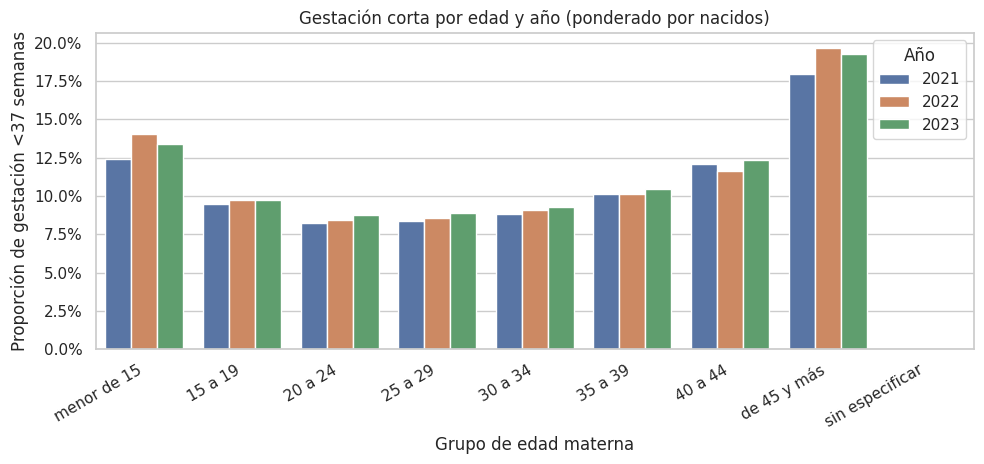

anio,2021,2022,2023
edad_ord,,,
menor de 15,0.124188,0.140596,0.133776
15 a 19,0.094900,0.097705,0.097514
20 a 24,0.082119,0.084612,0.087441
25 a 29,0.083896,0.085744,0.088843
30 a 34,0.088439,0.090951,0.092739


In [ ]:
# Filtramos categorías válidas
d_gc = df[(~df['edad_ord'].isin(['sin especificar'])) & (~df['gesta_ord'].isin(['sin especificar']))]

# Numerador: nacidos en gestación corta; Denominador: nacidos totales en el grupo
num = (d_gc[d_gc['gestacion_corta']==1]
       .groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())
den = (d_gc.groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())

gc_tab = (num/den).reset_index(name='prop_gc').sort_values(['anio','edad_ord'])

# --- Barras agrupadas ---
plt.figure(figsize=(10,4.8))
sns.barplot(data=gc_tab, x='edad_ord', y='prop_gc', hue='anio')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Proporción de gestación <37 semanas')
plt.xlabel('Grupo de edad materna')
plt.title('Gestación corta por edad y año (ponderado por nacidos)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f'{v*100:.1f}%'))
plt.legend(title='Año'); plt.tight_layout(); plt.show()

# (Opcional) Tabla para citar en el texto
gc_tab_piv = gc_tab.pivot(index='edad_ord', columns='anio', values='prop_gc')
gc_tab_piv.head()


los extremos etarios (adolescentes y ≥45) muestran mayor % de bajo peso que los grupos 25–29 / 30–34, y el patrón es consistente 2021→2023 (variaciones leves).
Conclusión: existe asociación entre edad materna y bajo peso; los extremos concentran mayor riesgo relativo.

In [ ]:
# Recalcula pivot si no lo tenés a mano
edad_order  = ['menor de 15','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39','40 a 44','de 45 y más']
d_bp = df[(~df['edad_ord'].isin(['sin especificar'])) & (~df['peso_ord'].isin(['sin especificar']))]
num_bp = (d_bp[d_bp['bajo_peso']==1].groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())
den_bp = (d_bp.groupby(['anio','edad_ord'], observed=True)['nacidos'].sum())
bp_tab  = (num_bp/den_bp).unstack('anio').reindex(index=edad_order).reindex(columns=['2021','2022','2023'])

# Helper para formatear
fmt = lambda x: f"{x*100:.1f}%"

# Celdas clave 2023
print("Bajo peso 2023 — <20 (menor de 15, 15–19):", fmt(bp_tab.loc['menor de 15','2023']), ",", fmt(bp_tab.loc['15 a 19','2023']))
print("Bajo peso 2023 — 25–29 y 30–34:", fmt(bp_tab.loc['25 a 29','2023']), ",", fmt(bp_tab.loc['30 a 34','2023']))
print("Bajo peso 2023 — ≥45:", fmt(bp_tab.loc['de 45 y más','2023']))

# Deltas 2021→2023 por edad
bp_delta = (bp_tab['2023'] - bp_tab['2021']).rename('Δ 2021→2023')
print("\nΔ 2021→2023 (puntos porcentuales) por edad:")
print((bp_delta*100).round(1))


Bajo peso 2023 — <20 (menor de 15, 15–19): 11.0% , 9.0%
Bajo peso 2023 — 25–29 y 30–34: 7.1% , 7.4%
Bajo peso 2023 — ≥45: 15.3%

Δ 2021→2023 (puntos porcentuales) por edad:
edad_ord
menor de 15    0.9
15 a 19        0.4
20 a 24        0.6
25 a 29        0.4
30 a 34        0.4
35 a 39        0.3
40 a 44        0.2
de 45 y más   -1.7
Name: Δ 2021→2023, dtype: float64


- <20 años: menor de 15 = 11.0%; 15–19 = 9.0%.

- Grupos de referencia: 25–29 = 7.1%; 30–34 = 7.4%.
- ≥45 años: 15.3%.

Conclusión puntual: En 2023, los extremos etarios concentran mayor % de bajo peso que 25–29/30–34. La brecha es clínicamente relevante (p.ej., 11.0% vs 7.1% ≈ +3.9 p.p. en <15 vs 25–29).

Evolución 2021→2023 (puntos porcentuales, por edad):

- Sube en casi todos los grupos (+0.3 a +0.9 p.p.),

- Baja en ≥45 (−1.7 p.p.).
Esto sugiere mejora en ≥45 y leve deterioro en el resto

In [ ]:
# % Bajo peso por año (global, ponderado)
bp_anio = ((df['bajo_peso']*df['nacidos']).groupby(df['anio']).sum()
           / df.groupby('anio')['nacidos'].sum()).rename('prop_bajo_peso')

# % Gestación corta por año (global, ponderado)
gc_anio = ((df['gestacion_corta']*df['nacidos']).groupby(df['anio']).sum()
           / df.groupby('anio')['nacidos'].sum()).rename('prop_gestacion_corta')

# Delta 2021→2023
resumen = pd.concat([bp_anio, gc_anio], axis=1)
resumen['Δ_bajo_peso_21_23'] = resumen.loc['2023','prop_bajo_peso'] - resumen.loc['2021','prop_bajo_peso']
resumen['Δ_gest_corta_21_23'] = resumen.loc['2023','prop_gestacion_corta'] - resumen.loc['2021','prop_gestacion_corta']
resumen


,prop_bajo_peso,prop_gestacion_corta,Δ_bajo_peso_21_23,Δ_gest_corta_21_23
anio,,,,
2021,0.071903,0.088166,0.005545,0.005825
2022,0.078198,0.091006,0.005545,0.005825
2023,0.077448,0.093992,0.005545,0.005825


Estadístico 1 — % de bajo peso (global):
2021 = 7.19%, 2022 = 7.82%, 2023 = 7.74% → Δ 21→23 = +0.55 p.p.

Estadístico 2 — % de gestación <37 semanas (global):
2021 = 8.82%, 2022 = 9.10%, 2023 = 9.40% → Δ 21→23 = +0.58 p.p.

Lectura: a nivel país, ambos indicadores aumentan levemente entre 2021 y 2023.

In [ ]:
# Formateo amigable del resumen
res_fmt = resumen.copy()
res_fmt['prop_bajo_peso'] = (res_fmt['prop_bajo_peso']*100).round(2).astype(str)+'%'
res_fmt['prop_gestacion_corta'] = (res_fmt['prop_gestacion_corta']*100).round(2).astype(str)+'%'
res_fmt['Δ_bajo_peso_21_23'] = (resumen['Δ_bajo_peso_21_23']*100).round(2).astype(str)+' p.p.'
res_fmt['Δ_gest_corta_21_23'] = (resumen['Δ_gest_corta_21_23']*100).round(2).astype(str)+' p.p.'
res_fmt


,prop_bajo_peso,prop_gestacion_corta,Δ_bajo_peso_21_23,Δ_gest_corta_21_23
anio,,,,
2021,7.19%,8.82%,0.55 p.p.,0.58 p.p.
2022,7.82%,9.1%,0.55 p.p.,0.58 p.p.
2023,7.74%,9.4%,0.55 p.p.,0.58 p.p.


- El % de bajo peso y la prematuridad son mayores en los extremos de edad (<20 y ≥45) y menores en 25–29/30–34; patrón estable 2021–2023.

- A nivel país, ambos indicadores aumentan levemente 2021→2023 (+0.55 p.p. bajo peso; +0.58 p.p. gestación corta).

- Excepción positiva: en ≥45 baja el bajo peso −1.7 p.p. (2021→2023).

- Todas las tasas reportadas están ponderadas por nacidos y, para análisis clínicos, excluyen “Sin especificar” (con la cobertura documentada)

# Conclusiones

- Patrón etario consistente (2021–2023): el % de bajo peso (<2500 g) y la gestación corta (<37 semanas) son más altos en los extremos de edad materna (<20 y ≥45) y más bajos en 25–29 y 30–34.

- Bajo peso (global, país): 2021 = 7.19%, 2022 = 7.82%, 2023 = 7.74% → Δ 21→23 = +0.55 p.p.

- Gestación corta (global, país): 2021 = 8.82%, 2022 = 9.10%, 2023 = 9.40% → Δ 21→23 = +0.58 p.p.

Brechas 2023 (ejemplos):

     - <20: 11.0% (menor de 15) y 9.0% (15–19) vs 25–29: 7.1% y 30–34: 7.4% (bajo peso).

     - ≥45: 15.3% (bajo peso) y ~19% (gestación corta).

- Evolución por edad (bajo peso, 2021→2023): sube +0.3 a +0.9 p.p. en casi todos los grupos; baja −1.7 p.p. en ≥45.

- Implicancia: la edad materna está asociada a resultados perinatales adversos; los extremos etarios requieren foco de seguimiento y prevención.

## Resumen ejecutivo

- **Pregunta guía:** ¿Cómo se relaciona la **edad materna** con la **gestación** y el **peso al nacer** en Argentina (2021–2023)?
- **Hallazgo clave:** Los **extremos etarios** (**<20** y **≥45**) muestran **más bajo peso (<2500 g)** y **más gestación corta (<37 semanas)**; los grupos **25–29 / 30–34** presentan los **mejores resultados**. El patrón es **consistente** 2021→2023.
- **Magnitud (2023):** Bajo peso — **<20**: 11.0% / 9.0%; **25–29**: 7.1%; **30–34**: 7.4%; **≥45**: 15.3%.  
  Global país: **Bajo peso** 7.19%→7.74% (**+0.55 p.p.** 2021→2023) y **Gestación corta** 8.82%→9.40% (**+0.58 p.p.**).
- **Metodología:** Integración de 2021–2023; limpieza y **orden lógico** en categorías; análisis **ponderado por nacidos**; “**Sin especificar**” cuantificado y **excluido** en vistas clínicas; 3 **features**: `madre_adolescente`, `gestacion_corta`, `bajo_peso`.
- **Recomendaciones:** Priorizar vigilancia en **adolescentes** y **≥45**; sostener la mejora en calidad de registro (reducir “Sin especificar”); desagregar por **provincia** y **tipo de parto** para gestión local; avanzar hacia modelos de **riesgo relativo** si se cuenta con microdatos.
